<center style='font-size:28px;'><u><b>EDA</b></u></center>

1. [Project Description](#start)
2. [Pre-Processing](#pp)
    * [Reading File](#refa)
    * [`is_4wd`](#isfwd)
    * [`model_year`](#modyr)
    * [`cylinders`](#cylin)
    * [`paint_color`](#pancol)
    * [`odometer`](#odome)
    * [Enriching](#enrch)
    * [Categorising `condition`](#catcon)
    * [Duplicates and Hiding None's](#duphidn)
    * [Pre-Processing Summation](#ppsum)
3. [EDA](#eda)
    * [`price`](#pri)
    * [`age_when_added`](#agewha)
    * [`odometer`](#od)
    * [`cylinders`](#cylineda)
    * [`condition`](#condeda)
    * [EDA Summation](#edasum)
4. [Filtering](#filter)
    * [Filtered `price`](#filtprc)
    * [Filtered `age_when_added`](#fawad)
    * [Filtered `odometer`](#fodmtr)
    * [Filtered `cylinders`](#fcyl)
    * [Filtered `condition`](#ficond)
    * [Filtering Summation](#filtsum)
5. [Analysis](#anaafft)
    * [`days_listed`](#dayls)
    * [Number of Ads by Type](#noabt)
    * [Price Analysis](#prcfct)
        * [Creating 2 Boards for SUV's and Sedan's](#cbrdss)
        * [Unifying Rare Data](#urd)
        * [Price vs Age](#prcage)
        * [Price vs Mileage](#prcmlg)
        * [Price vs Condition](#prccond)
        * [Price vs Transmission](#prctrnsms)
        * [Price vs Color](#prclr)    
6. [Conclusion](#conc)

# Project Description <a id="start"></a>

Hundreds of free advertisements for vehicles are published on Crankshaft List's site every day.

Data collected over the last few years will be used to determine which factors influence the price of a vehicle. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Pre-Processing <a id="pp"></a>

## Reading File <a id="refa"></a> 

In [3]:
try:
    vehicle_board = pd.read_csv('vehicles_us.csv')
except:
    vehicle_board = pd.read_csv('https://code.s3.yandex.net/datasets/vehicles_us.csv')

In [4]:
vehicle_board.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
vehicle_board.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


5 columns contain missing values. In addition, some types need to be changed: `model_year` and `cylinders` should obviously be an int, and `is_4wd` should be boolean.

## `is_4wd` <a id="isfwd"></a>

In [6]:
print(vehicle_board['is_4wd'].value_counts())
print(vehicle_board['is_4wd'].isna().sum())

1.0    25572
Name: is_4wd, dtype: int64
25953


The sum of the 1.0's and Nan's is equal to the length of the dataframe.
It'll be safe to assume those Nan's mean 0, i.e - doesn't have 4WD. So, those Nan's to be filled with 0:

In [7]:
vehicle_board['is_4wd'].fillna(0, inplace=True)

In [8]:
vehicle_board['is_4wd'] = vehicle_board['is_4wd'].astype(bool)

## `model_year` <a id="modyr"></a>

In [9]:
print(vehicle_board['model_year'].isna().mean())

0.07023774866569626


7% of missing values. Theyr'e to be filled according to each model's year median:

In [10]:
vehicle_board['model_year'] = vehicle_board.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))
print(vehicle_board['model_year'].isna().sum())

0


Column can be casted to int type, as year is an integer

In [11]:
vehicle_board['model_year'] = vehicle_board['model_year'].astype('int64')

## `cylinders` <a id="cylin"></a>

In [12]:
print(vehicle_board['cylinders'].isna().mean())

0.10208636584182436


10% of missing values. To be filled according to each model's mean.

In [13]:
vehicle_board['cylinders'] = vehicle_board.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median()))
print(vehicle_board['cylinders'].isna().sum())

0


No car has half a cylinder, so column can be casted to int type:

In [14]:
vehicle_board['cylinders'] = vehicle_board['cylinders'].astype('int64')

## `paint_color` <a id="pancol"></a>

In [15]:
print(vehicle_board['paint_color'].value_counts())
vehicle_board['paint_color'].isna().mean()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64


0.17985443959243086

18% of missing values. To be filled with 'unknown', to avoid problems concerning None's later:

In [16]:
vehicle_board['paint_color'].fillna('unknown', inplace=True)
vehicle_board['paint_color'].isna().sum()

0

## `odometer` <a id="odome"></a>

In [17]:
vehicle_board['odometer'].isna().mean()

0.15316836487142163

Missing values to be filled with the matching `condition` `odometer`'s median.

In [18]:
vehicle_board['odometer'] = vehicle_board.groupby(['condition'])['odometer'].transform(lambda x: x.fillna(x.median()))
print(vehicle_board['odometer'].isna().sum())

0


## Enriching <a id="enrch"></a>

In [19]:
vehicle_board['date_posted'] = pd.to_datetime(vehicle_board['date_posted'], format='%Y-%m-%d')
vehicle_board['date_posted_new'] = vehicle_board['date_posted'].dt.day_name() + ', ' + vehicle_board['date_posted'].dt.month_name() + ', ' + vehicle_board['date_posted'].dt.year.astype(str)

vehicle_board['age_when_added'] =  vehicle_board['date_posted'].dt.year - vehicle_board['model_year'] + ((vehicle_board['date_posted'].dt.month - 1) / 12) + (vehicle_board['date_posted'].dt.day / 365)

#mpy - miles per year
vehicle_board['mpy'] = vehicle_board['odometer'] / vehicle_board['age_when_added']
#substituting the negative values to unknown, as the odometer at those rows is unknown
vehicle_board.loc[vehicle_board['mpy'] < 0, 'mpy'] = 'unknown'

## Categorising `condition` <a id="catcon"></a>

In [20]:
def condition_categoriser(condition):
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'excellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1
    else:
        return 0
vehicle_board['condition'] = vehicle_board['condition'].apply(condition_categoriser)

## Duplicates and Hiding None's <a id="duphidn"></a>

In [21]:
print(vehicle_board.duplicated().sum())
columns = vehicle_board.columns
lst = []
for column in columns:
    tmp = vehicle_board.loc[vehicle_board[column] == 'None',column].count()
    lst.append(tmp)
lst

0


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

No duplicates or Nones.

import warnings

warnings.filterwarnings('ignore')

## Pre-Processing Summation <a id="ppsum"></a>

- Missing data in 5 columns is now filled. Around 15% of the data
- Data enriched with 3 new columns

# EDA <a id="eda"></a>

## `price` <a id="pri"></a>

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

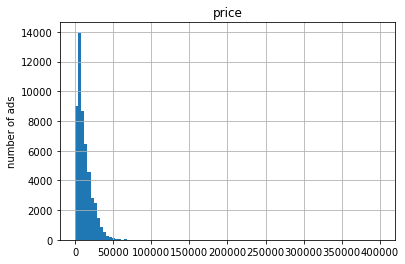

In [22]:
h = vehicle_board.hist('price', bins=100, range=(0,400000))

for ax in h.flatten():
    ax.set_ylabel("number of ads")
    
vehicle_board.price.describe()

Q1-1.5IQR is less than 0 so no "bottom" outliers. 
Upper limit is Q3 + 1.5IQR = 34600.
Most frequent price is around 9000 USD.

## `age_when_added` <a id="agewha"></a>

count    51525.000000
mean         9.025274
std          6.104661
min          0.002740
25%          4.726941
50%          8.002740
75%         12.210502
max        110.516438
Name: age_when_added, dtype: float64

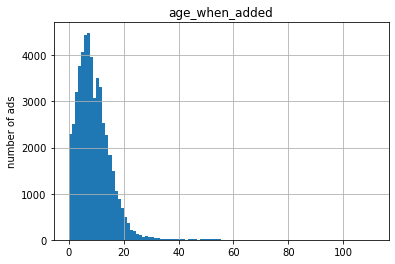

In [23]:
vehicle_board.hist('age_when_added', bins=100, range=(0,111))
plt.ylabel('number of ads')
vehicle_board.age_when_added.describe()

The peak's at around 9 years of age, and there's another smaller one around 12 years of age. There's a steep drop between those 2 peaks. Maybe it's connected to the 2008 global economic crisis, so less cars were bought. Like before, there are no small outliers as Q1-1.5IQR < 0. Q3+1.5IQR = 23.4.

## `odometer` <a id="od"></a>

count     51525.000000
mean     115199.014508
std       60484.863376
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

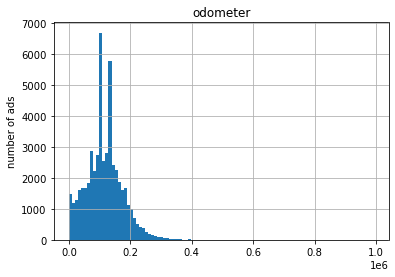

In [24]:
vehicle_board.hist('odometer', bins=100, range=(-2,991000))
plt.ylabel('number of ads')
vehicle_board.odometer.describe()

There's a summit at 100k, with the overall shape resembling a gausian bell cut at 0. There's a local maximum at 0, suggesting a market for 0 mileage cars. Above 0.3e6 the values are considered outliers, and the histogram doesn't appear to be affected by this minority - as the mean and median are pretty close.

## `cylinders` <a id="cylineda"></a>

count    51525.000000
mean         6.121067
std          1.657457
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

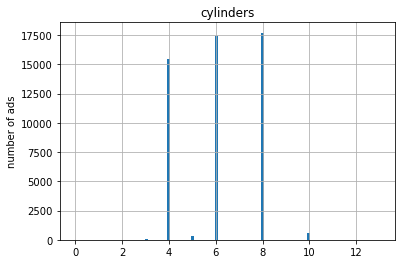

In [25]:
vehicle_board.hist('cylinders', bins=100, range=(0,13))
plt.ylabel('number of ads')
vehicle_board.cylinders.describe()

Most cars have either 4, 6 or 8 cylinders. No outliers as Q1-1.5IQR < 0 and Q3+1.5IQR > max cylinders value.

## `condition` <a id="condeda"></a>

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

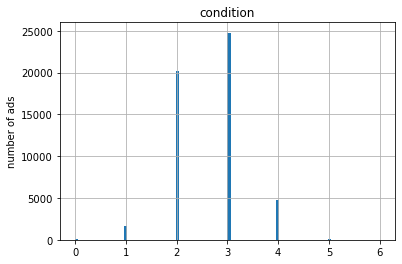

In [26]:
vehicle_board.hist('condition', bins=100, range=(0,6))
plt.ylabel('number of ads')
vehicle_board.condition.describe()

Most cars are in excellent to good condition.

## EDA Summation <a id="edasum"></a>

- Around 2008 car prices went down. Might be linked to the 2008 economic crisis.

The typical car in the board -
- Is 9 years old
- Has around 110k mileage
- Offered for 9k USD
- Has 4,6 or 8 cylinders
- Is in good to excellent shape

# Filtering <a id="filter"></a>

In [27]:
filtered_vehicle_board = vehicle_board.query('(price > 100) & (price < 34597.5) & (age_when_added < 23.4) & (odometer < 312508.5) & (odometer >= 0)')

Data filtered for reasonable prices, and for not too big mileage or age

## Filtered `price` <a id="filtprc"></a>

count    47842.000000
mean     11400.689436
std       7742.323315
min        105.000000
25%       5289.250000
50%       8999.000000
75%      15995.000000
max      34595.000000
Name: price, dtype: float64

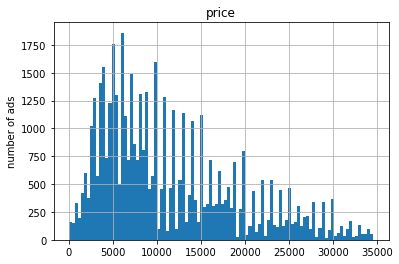

In [28]:
filtered_vehicle_board.hist('price', bins=100, range=(0,34600))
plt.ylabel('number of ads')
filtered_vehicle_board.price.describe()

Now the shape is more clear. The median is 9000, same as before.

Before filtering, there was a local peak at 0. Now there's a small rise in frequency from about 700 to 100 USD - as the price is getting lower (in that range), frequency goes up.

## Filtered `age_when_added` <a id="fawad"></a>

count    47842.000000
mean         8.832088
std          4.940288
min          0.002740
25%          5.035616
50%          8.124429
75%         12.102511
max         23.399087
Name: age_when_added, dtype: float64

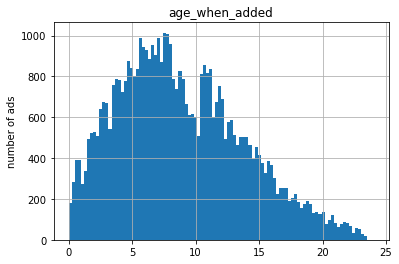

In [29]:
filtered_vehicle_board.hist('age_when_added', bins=100, range=(0,24))
plt.ylabel('number of ads')
filtered_vehicle_board.age_when_added.describe()

There are 2 peaks, around 7.5 and 12, and now the drop between is wider than before, so it looks a less sudden drop: a decrease thet went on for around 2-3 years before reaching its lowest point at 10 years of age. The 2nd peak is preceded by an extreme jump in frequency - Maybe people were keen to buy a new car after years of economic depression. Or maybe the car manufacturers started to use lesser quality materials for their cars in response to economic depression.
It looks strange the median went higher after we cut higher values - But one should remember we cropped data from not only this column.

## Filtered `odometer` <a id="fodmtr"></a>

count     47842.000000
mean     116909.101407
std       55649.606368
min           0.000000
25%       81226.250000
50%      114000.000000
75%      149014.000000
max      312000.000000
Name: odometer, dtype: float64

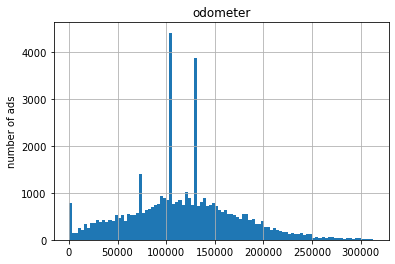

In [30]:
filtered_vehicle_board.hist('odometer', bins=100, range=(-1,313000))
plt.ylabel('number of ads')
filtered_vehicle_board.odometer.describe()

Now, after zooming in, the popularity of cars with around 115k milage is pretty apparent. There's another peak at 0 - Leasing companies and private low-mileage sellers form a sub-market.

## Filtered `cylinders` <a id="fcyl"></a>

count    47842.000000
mean         6.030893
std          1.635374
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

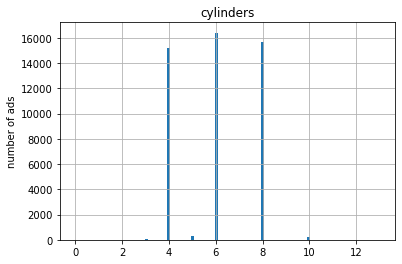

In [31]:
filtered_vehicle_board.hist('cylinders', bins=100, range=(0,13))
plt.ylabel('number of ads')
filtered_vehicle_board.cylinders.describe()

Earlier 8 cylinders were at top, while now 6 cylinders take the lead, and thats when `cylinder` had no outliers. One should remember we cropped 5 columns, not just the `cylinder` column.

## Filtered `condition` <a id="ficond"></a>

count    47842.000000
mean         2.624953
std          0.702585
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

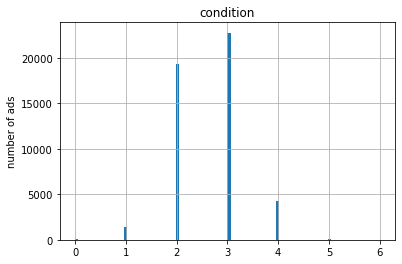

In [32]:
filtered_vehicle_board.hist('condition', bins=100, range=(0,6))
plt.ylabel('number of ads')
filtered_vehicle_board.condition.describe()

The histogram closely resemble the pre-filtering one.

## Filtering Summation <a id="filtsum"></a>

- `price` - Majority of cars are offered for 5000 to 9000 USD.

- `age_when_added` - Like before, Something strange around 2008 became apparent; Now it seems that after the economic crisis, the market almost suddenly came to the standards of the days before the crisis.

- `odometer` - There's a trend of selling cars with 0 mileage. Leasing companies might have a role in this.

- `cylinders` - The vast majority of cars on our board have either 4,6 or 8 cylinders.

- `condition` - Most cars in the board are in 'excellent'/'good' condition. 'like new' and 'fair' are much less common.

# Analysis <a id="anaafft"></a>

## `days_listed` <a id="dayls"></a>

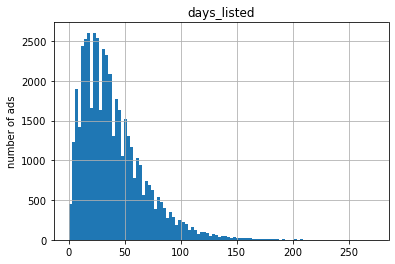

count    47842.000000
mean        39.545817
std         28.211512
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [33]:
filtered_vehicle_board.hist('days_listed', bins=100, range=(0,272))
plt.ylabel('number of ads')
plt.show()
filtered_vehicle_board.days_listed.describe()

The upper limit for outliers is Q3+1.5IQR = 53 + 51=104, and indeed there aren't many ads beyond that border.
The typical lifetime of an ad is between Q1 to Q3, i.e between 19 to 53 days. Ads that been on the board for more than 104 days are considered to be there for a very long time, while cars that got sold under 7 days are considered to be removed quickly.

## Number of Ads by Type <a id="noabt"></a>

In [34]:
type_table = filtered_vehicle_board.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
type_table = type_table.sort_values(('count', 'price'), ascending=False)
display(type_table)

,count,mean
,price,price
type,,
sedan,11898,7058.429316
SUV,11693,10665.266997
truck,10944,15473.249726
pickup,6364,14999.556882
coupe,1933,14070.243145
wagon,1528,8892.565445
mini-van,1152,8026.243056
hatchback,1004,6874.542829


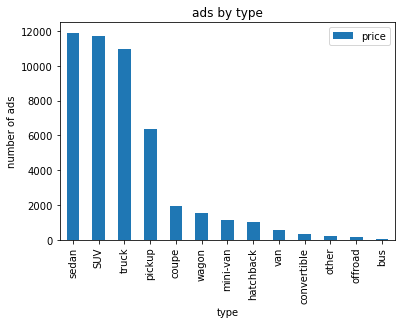

In [35]:
type_table['count'].plot(title='ads by type', kind='bar')
plt.ylabel('number of ads')
plt.show()

Most popular types are Sedan's and SUV's

## Price Analysis <a id="prcfct"></a>

### Creating 2 Boards for SUV's and Sedan's <a id="cbrdss"></a>

In [36]:
SUV_board = filtered_vehicle_board[filtered_vehicle_board['type'] == 'SUV']
sedan_board = filtered_vehicle_board[filtered_vehicle_board['type'] == 'sedan']

### Unifying Rare Data <a id="urd"></a>

In [37]:
print('SUV\n')
print(SUV_board.paint_color.value_counts())
print('\n')
print(SUV_board.transmission.value_counts())
print('\nSedan\n')
print(sedan_board.paint_color.value_counts())
print('\n')
print(sedan_board.transmission.value_counts())

SUV

unknown    2088
black      2036
white      1846
silver     1511
grey       1133
blue        997
red         863
green       420
brown       357
custom      277
orange       81
yellow       45
purple       39
Name: paint_color, dtype: int64


automatic    11143
manual         457
other           93
Name: transmission, dtype: int64

Sedan

unknown    2132
silver     2038
black      1743
grey       1617
white      1461
blue       1209
red         917
custom      268
brown       253
green       203
purple       26
yellow       22
orange        9
Name: paint_color, dtype: int64


automatic    11247
manual         577
other           74
Name: transmission, dtype: int64


Every category in transmission has at least 50 ads, for both type of cars. However, thats not the case with colors: For SUV's, yellow and purple both have less than 50 ads; For Sedan's - purple, yellow and orange have less than 50 ads.

SUV's color minorities will be united into one 'generalised' color - yellow/purple.
The sedan color minorities can't be handled the same way, as the sum of all minorities is still less than 50. So, those rows of sedan color minorities will be dropped.

In [38]:
SUV_board.loc[(SUV_board['paint_color'] == 'yellow') | (SUV_board['paint_color'] == 'purple'), 'paint_color'] = 'yellow/purple'
sedan_board.drop(sedan_board[(sedan_board['paint_color'] == 'purple') | (sedan_board['paint_color'] == 'yellow') | (sedan_board['paint_color'] == 'orange')].index, inplace=True)

### Price vs Age <a id="prcage"></a>

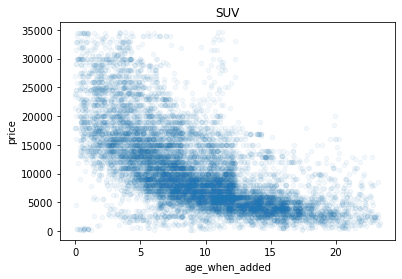

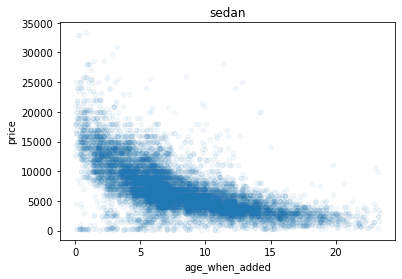

In [39]:
SUV_board.plot(x='age_when_added', y='price', kind='scatter', alpha = 0.05, title='SUV')
plt.savefig('')
sedan_board.plot(x='age_when_added', y='price', kind='scatter', alpha = 0.05, title='sedan')
plt.savefig('')

As can be expected, in both cases the price diminishes as the car is older. Altough, in both cases its pretty surprising to see a cluster of new cars that are sold almost for free (100 USD). Its the filtered data, so no outliers involved in this strange thing. 

### Price vs Mileage <a id="prcmlg"></a>

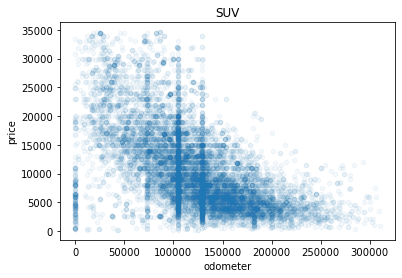

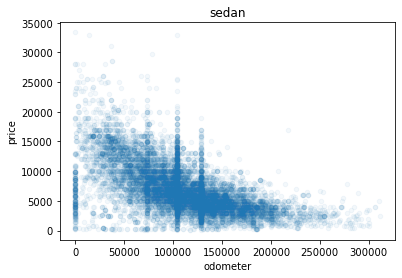

In [40]:
SUV_board.plot(x='odometer', y='price', kind='scatter', alpha = 0.05, title='SUV')
plt.savefig('')
sedan_board.plot(x='odometer', y='price', kind='scatter', alpha = 0.05, title='sedan')
plt.savefig('')

As expected, price goes down when the mileage grows. In both cases, its surprising to see road-free cars sold almost for free.

### Price vs Condition <a id="prccond"></a>

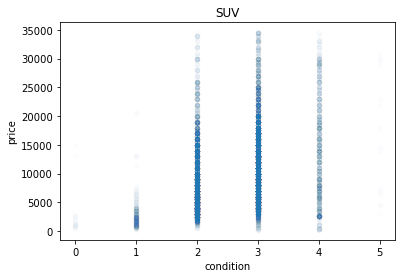

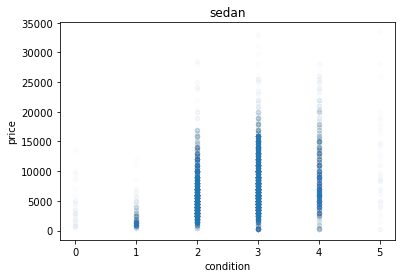

In [41]:
SUV_board.plot(x='condition', y='price', kind='scatter', alpha = 0.01, title='SUV')
plt.savefig('')
sedan_board.plot(x='condition', y='price', kind='scatter', alpha = 0.01, title='sedan')
plt.savefig('')

As the condition's better, the price goes up - At least for conditions of types 1,2,3. The 4th condition's surprisingly cost less. Cheap to begin with cars must account for some of that.

### Price vs Transmission <a id="prctrnsms"></a>

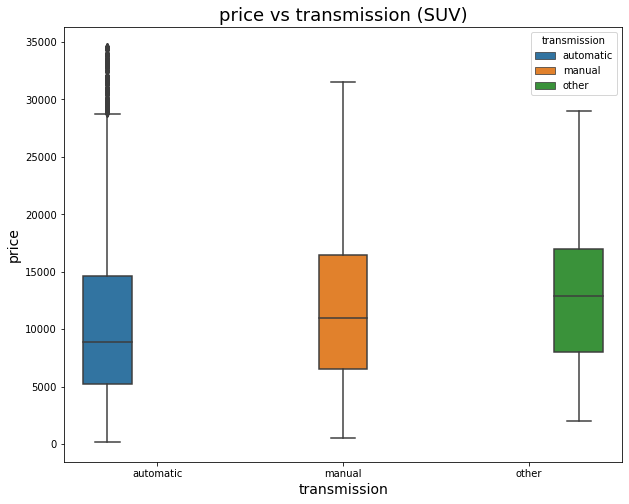

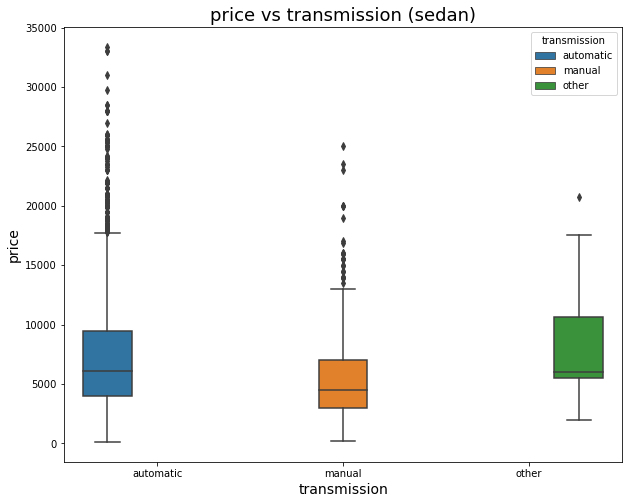

In [42]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="transmission", y="price", hue='transmission',data=SUV_board)
plt.ylabel("price", size=14)
plt.xlabel("transmission",size=14)
plt.title("price vs transmission (SUV)", size=18)
plt.savefig('')
plt.figure(figsize=(10, 8))
sns.boxplot(x="transmission", y="price", hue='transmission',data=sedan_board)
plt.ylabel("price", size=14)
plt.xlabel("transmission",size=14)
plt.title("price vs transmission (sedan)", size=18)
plt.savefig('')

Manual SUV's cost more than automatic SUV's - And the opposite for sedans.
In a sport/terrain inclined category, its no surprise manual gearbox is more acclaimed for SUV's.
For sedans, the normal use is home-work routes, and automatic gearbox is apparently more desirable.

### Price vs Color <a id="prclr"></a>

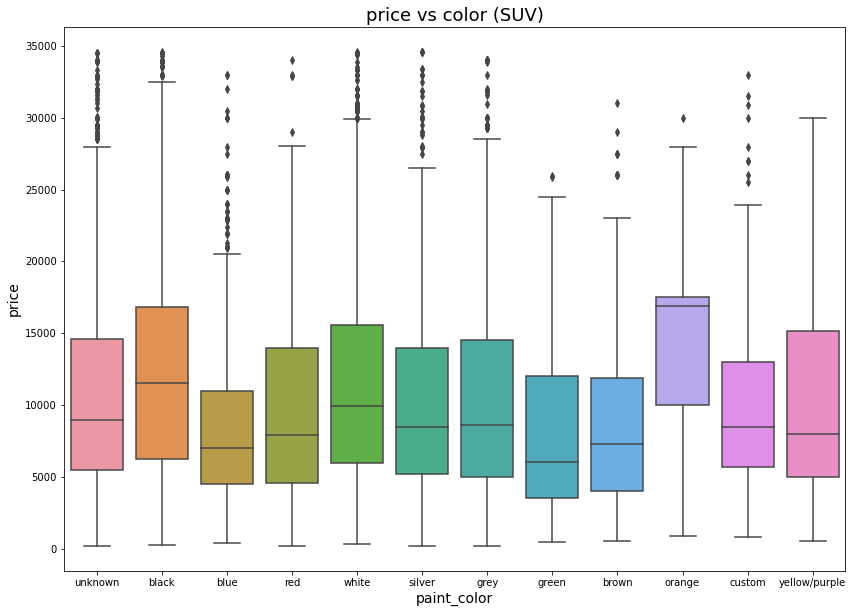

In [43]:
plt.figure(figsize=(14, 10))
sns.boxplot(x="paint_color", y="price",data=SUV_board)
plt.ylabel("price", size=14)
plt.xlabel("paint_color",size=14)
plt.title("price vs color (SUV)", size=18)
plt.savefig('')

It stands out that orange cars are by far the most expensive, followed by black and white. The cheapest color is green.
As for White and Black, it make sense, as those are the most utilized colors - white's good for hot weather, and black's good for cold. As for orange, it is a popular color among elite sport cars. 

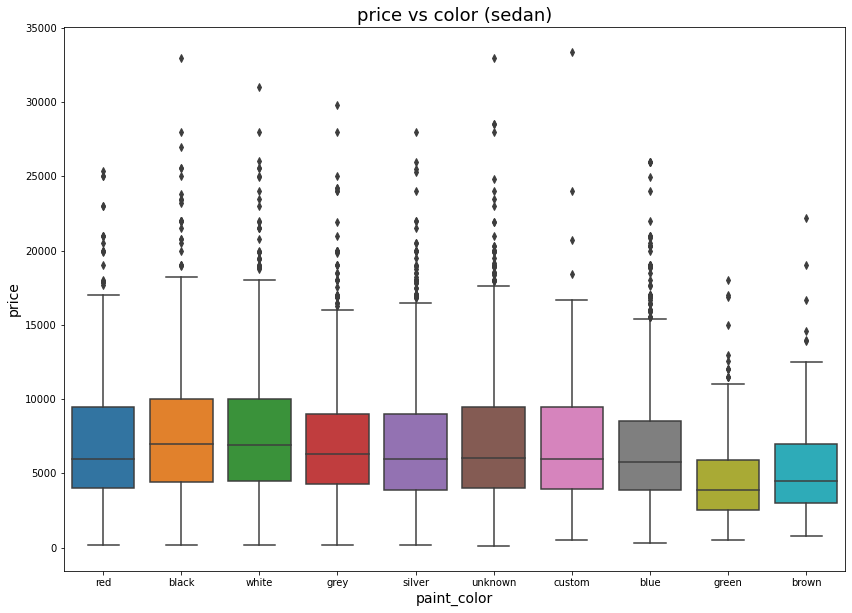

In [44]:
plt.figure(figsize=(14, 10))
sns.boxplot(x="paint_color", y="price", data=sedan_board)
plt.ylabel("price", size=14)
plt.xlabel("paint_color",size=14)
plt.title("price vs color (sedan)", size=18)
plt.savefig('')

All colors are about the same price. Again, green is the cheapest color, and white and black are sligtly more expensive. Sedans, being "normal" family oriented cars, don't have orange instances in the data.

# Conclusion <a id="conc"></a>

- Only SUV's and Sedan's data was analysed.

- Generally, as mileage and age grows the price goes down. Better condition car costs more as well.

However, some peculiar trends were noted:

- Theres a non negligble amount of practically new cars (age-wise and mileage-wise; For now it's not known if the same cars are responsible for both peculiarities in those parameters) that get sold almost for free.
- "like new" condition turned out to be cheaper than cars in a worse condition.
- Orange color for a SUV is a thing
- Green is the least expensive color for a car, in either category (SUV and Sedans)